In [2]:
import pandas as pd
data1=pd.read_csv("./telecom.csv")

In [3]:
data1.head()

,state,account length,area code,phone number,internationalplan,voicemailplan,number vmail messages,totaldayminutes,totaldaycalls,totaldaycharge,...,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,customerservicecalls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
X = data1.iloc[:,6:20].values
X

array([[ 25.  , 265.1 , 110.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 26.  , 161.6 , 123.  , ...,   3.  ,   3.7 ,   1.  ],
       [  0.  , 243.4 , 114.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [  0.  , 180.8 , 109.  , ...,   6.  ,   3.81,   2.  ],
       [  0.  , 213.8 , 105.  , ...,  10.  ,   1.35,   2.  ],
       [ 25.  , 234.4 , 113.  , ...,   4.  ,   3.7 ,   0.  ]])

In [16]:

Y=data1.iloc[:,20].values
Y

array([False, False, False, ..., False, False, False])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
Y_pred = classifier.predict(X_test)

In [21]:
Y_pred

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[560   7]
 [ 70  30]]
              precision    recall  f1-score   support

       False       0.89      0.99      0.94       567
        True       0.81      0.30      0.44       100

    accuracy                           0.88       667
   macro avg       0.85      0.64      0.69       667
weighted avg       0.88      0.88      0.86       667



In [23]:
import numpy as np
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

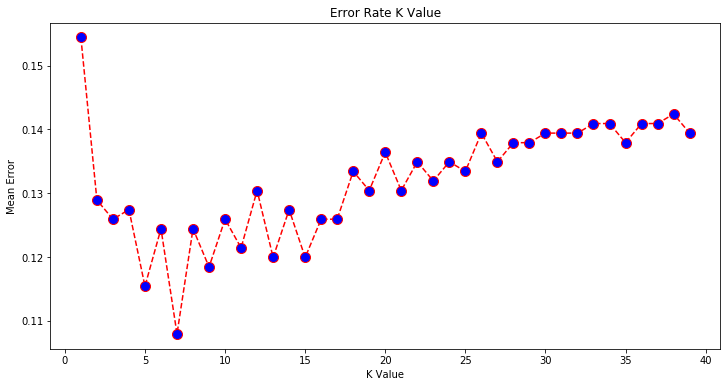

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')